In [ ]:
import numpy as np
import pandas as pd
import torch.nn as nn
import pickle
import plotly.express as px
import torch
from scipy import ndimage

import matplotlib.pyplot as plt
from scipy import fftpack

import os
from pathlib import Path

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = []
positions = []
neuron_failed = []
for n in [1,2]:
  file = open('drive/MyDrive/data/IM{}'.format(n), 'rb')
  IM = pickle.load(file)
  file.close()
  images.append(IM)
  print(len(IM))
  failed = np.zeros(IM.shape[0])
  file = open('drive/MyDrive/data/neuron_failed{}'.format(n), 'rb')
  temp = pickle.load(file)
  if temp != []:
    failed[np.array(pickle.load(file))] = 1
  file.close()
  neuron_failed.append(failed)
  file = open('drive/MyDrive/data/postion{}'.format(n), 'rb')
  pos = pd.DataFrame(pickle.load(file)).reset_index().reset_index()
  print(pos.shape)
  file.close()
  pos['probe'] = 'C'
  pos['mice'] = np.ones(pos.shape[0])*n
  pos['failed_neuron'] = failed
  pos.mice.astype(int)
  positions.append(pos)
position = pd.concat(positions)


207
(207, 5)
112
(112, 5)


In [ ]:
imagesB = []
positionsB = []
neuron_failedB = []
for n in [1,2]:
  file = open('drive/MyDrive/data/IMB{}'.format(n), 'rb')
  IMB = pickle.load(file)
  file.close()
  imagesB.append(IMB)
  failed = np.zeros(IMB.shape[0])
  print(len(IMB))
  file = open('drive/MyDrive/data/neuron_failedB{}'.format(n), 'rb')
  temp = pickle.load(file)
  if temp != []:
    failed[np.array(pickle.load(file))] = 1
  file.close()
  neuron_failedB.append(failed)
  file = open('drive/MyDrive/data/postionB{}'.format(n), 'rb')
  pos = pd.DataFrame(pickle.load(file)).reset_index().reset_index()
  file.close()
  print(len(pos))
  pos['probe'] = 'B'
  pos['mice'] = np.ones(pos.shape[0])*n
  pos['failed_neuron'] = failed
  pos.mice.astype(int)
  positionsB.append(pos)
positionB = pd.concat(positionsB)
position = pd.concat([position, positionB])

202
202
51
51


In [ ]:
position.shape

(572, 8)

In [ ]:
print(neuron_failedB)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.,

In [ ]:
#position = position[-((position['probe']=='B')&(position['mice']==0.0))]


In [ ]:
from sklearn.cluster import SpectralClustering, KMeans
Clustering = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(position[['dorsal_ventral_ccf_coordinate']])
position['labels'] = Clustering.labels_

In [ ]:
fig = px.scatter_3d(position, x = position.anterior_posterior_ccf_coordinate, z =position.dorsal_ventral_ccf_coordinate, y= position.left_right_ccf_coordinate, hover_name = position.index, symbol=position.labels, color = position.mice )
fig.update_traces(marker_size = 4)
fig.show()
plt.close()

In [ ]:
list_cluster1 = []
position = position.sort_values(['mice', 'probe'])
pos = position[position['labels']==0]
for index, row in pos.iterrows():
  if row.probe =='B':
    list_cluster1.append(imagesB[int(row.mice)-1][int(row['index'])])
  if row.probe =='C':
    list_cluster1.append(images[int(row.mice)-1][int(row['index'])])

list_cluster2 = []
pos = position[position['labels']==1]
for index, row in pos.iterrows():
  if row.probe =='B':
    list_cluster2.append(imagesB[int(row.mice)-1][int(row['index'])])
  if row.probe =='C':
    list_cluster2.append(images[int(row.mice)-1][int(row['index'])])

list_cluster3 = []
pos = position[position['labels']==2]
for index, row in pos.iterrows():
  if row.probe =='B':
    list_cluster3.append(imagesB[int(row.mice)-1][int(row['index'])])
  if row.probe =='C':
    list_cluster3.append(images[int(row.mice)-1][int(row['index'])])


In [ ]:

def diff_images(im_1,im_2):
  temp = sum(sum((im_1-im_2)**2))**0.5
  if not type(temp) is np.float64:
    temp = sum(temp)
  return temp

def pairwise(data):
  diff = []
  for i in range(data.shape[0]):
    dif = []
    for j in range(data.shape[0]):
      if i !=j:
        dif.append(diff_images(data[i],data[j]))
      else:
        dif.append(np.nan)
    diff.append(dif)
  return diff


def meanrgb(rgb):
    #turns the rgb channel to black and white according to wikipedia def
    r, g, b = rgb[0, :, :], rgb[1, :, :], rgb[2, :, :]
    gray =  0.33* r + 0.33* g + 0.33 * b
    return gray

In [ ]:
stacked = np.vstack([imagesB[0], images[0], imagesB[1], images[1]])
low_freq_stacked = np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.vstack([imagesB[0], images[0], imagesB[1], images[1]])])
high_freq_stacked = np.array([meanrgb(i) for i in np.vstack([imagesB[0], images[0], imagesB[1], images[1]])])-np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.vstack([imagesB[0], images[0], imagesB[1], images[1]])])


In [ ]:
pair_all = pairwise(stacked)
pair_all_low = pairwise(low_freq_stacked)
pair_all_high = pairwise(high_freq_stacked)

Text(0.5, 0.98, 'pairwise difference of MEI for mice 1, 2 and probe B,C')

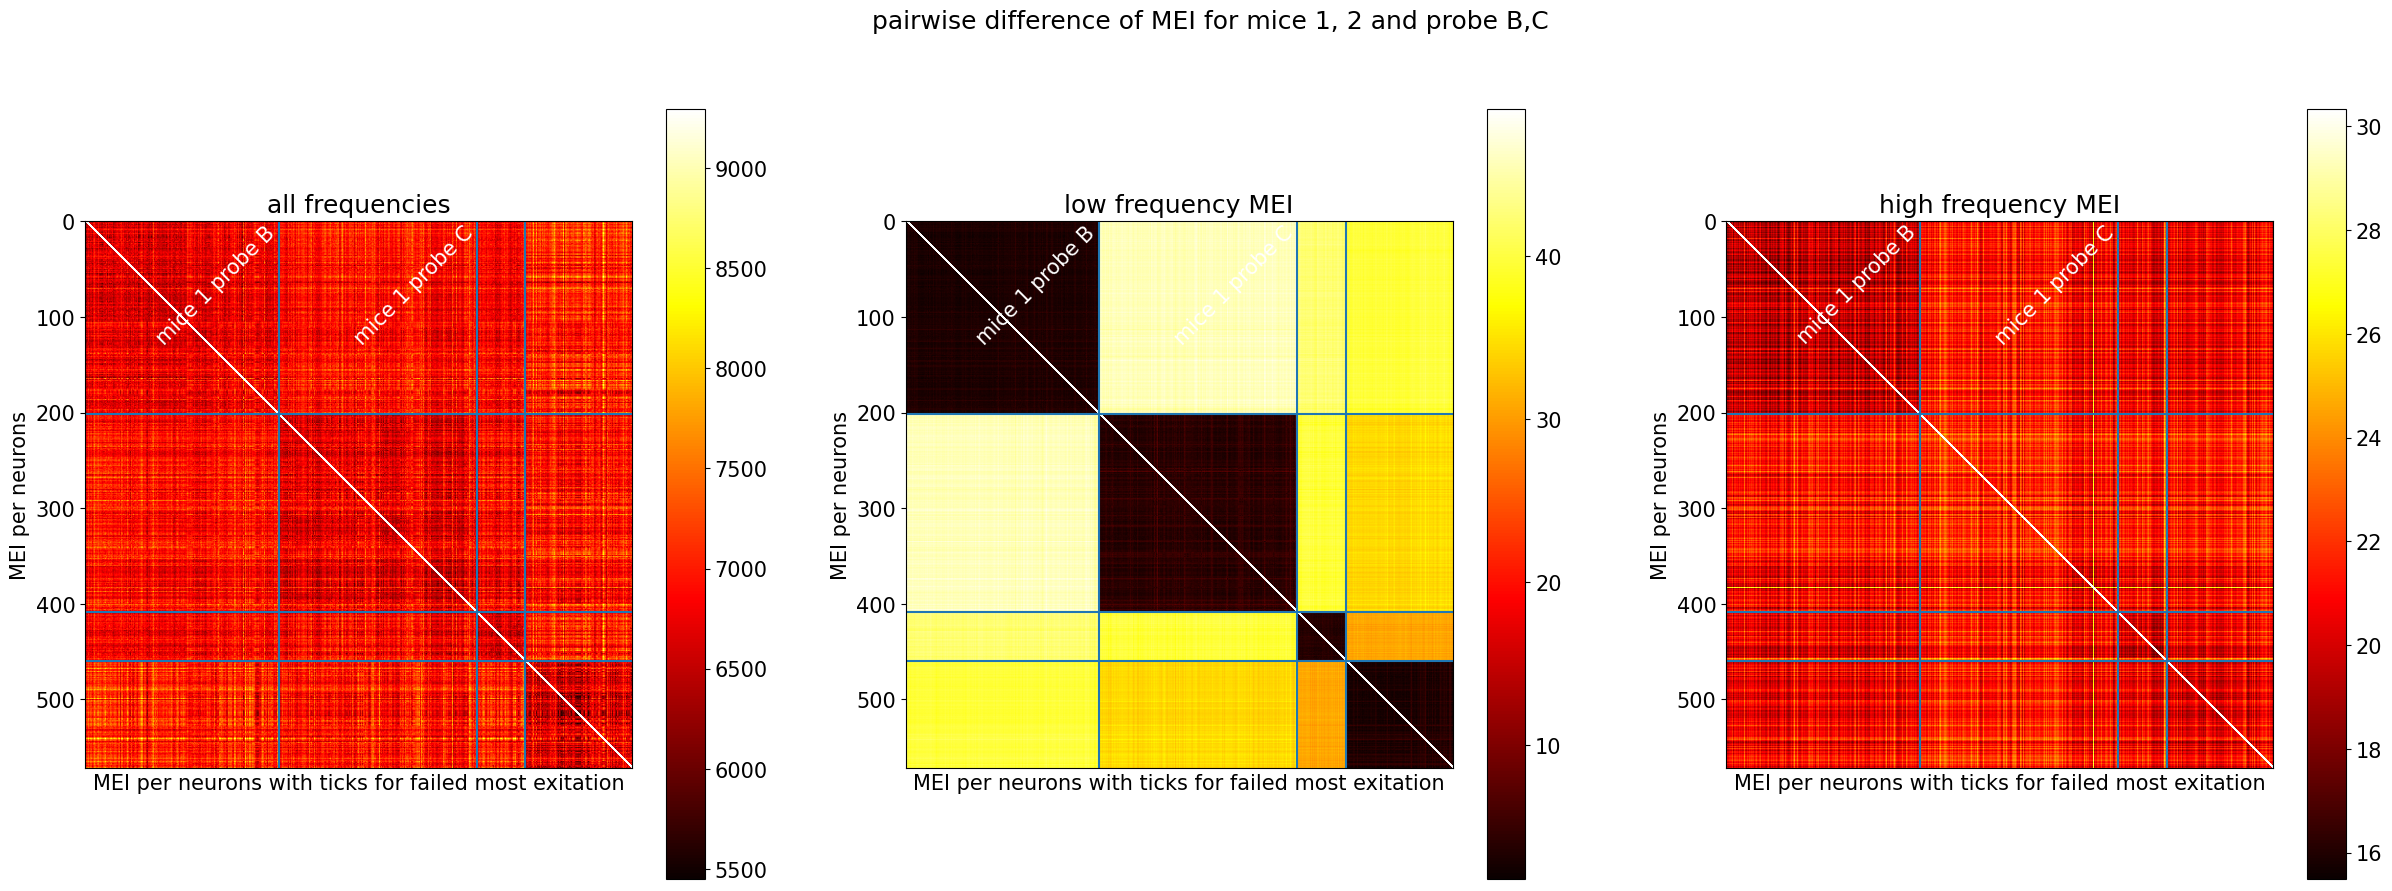

In [ ]:
plt.figure(figsize=(30, 10))  # Set the figure size as needed
plt.rcParams.update({'font.size': 15})
plt.subplot(1, 3, 1)
plt.imshow(pair_all, cmap = 'hot')
plt.axvline(imagesB[0].shape[0])
plt.text(imagesB[0].shape[0], 0.99, 'mice 1 probe B', rotation = 45,  va='top', ha = 'right', color = 'w')
plt.axvline(images[0].shape[0]+imagesB[0].shape[0])
plt.text(images[0].shape[0]+imagesB[0].shape[0], 0.99, 'mice 1 probe C', rotation = 45,  va='top', ha = 'right', color = 'w')
plt.axvline(imagesB[0].shape[0]+imagesB[1].shape[0]+images[0].shape[0])
plt.axhline(imagesB[0].shape[0])
plt.axhline(imagesB[0].shape[0]+images[0].shape[0])
plt.axhline(imagesB[0].shape[0]+imagesB[1].shape[0]+images[0].shape[0])
plt.xticks(np.where(position.sort_values(['mice', 'probe']).failed_neuron)[0],color='w' )
plt.colorbar()
plt.ylabel('MEI per neurons')
plt.xlabel('MEI per neurons with ticks for failed most exitation')
plt.title('all frequencies')
plt.subplot(1, 3, 2)
plt.imshow(pair_all_low, cmap = 'hot')
plt.axvline(imagesB[0].shape[0])
plt.text(imagesB[0].shape[0], 0.99, 'mice 1 probe B', rotation = 45,  va='top', ha = 'right', color = 'w')
plt.axvline(images[0].shape[0]+imagesB[0].shape[0])
plt.text(images[0].shape[0]+imagesB[0].shape[0], 0.99, 'mice 1 probe C', rotation = 45,  va='top', ha = 'right', color = 'w')
plt.axvline(imagesB[0].shape[0]+imagesB[1].shape[0]+images[0].shape[0])
plt.axhline(imagesB[0].shape[0])
plt.axhline(imagesB[0].shape[0]+images[0].shape[0])
plt.axhline(imagesB[0].shape[0]+imagesB[1].shape[0]+images[0].shape[0])
plt.xticks(np.where(position.sort_values(['mice', 'probe']).failed_neuron)[0],color='w' )
plt.colorbar()
plt.ylabel('MEI per neurons')
plt.xlabel('MEI per neurons with ticks for failed most exitation')
plt.title('low frequency MEI')
plt.subplot(1, 3, 3)
plt.imshow(pair_all_high, cmap = 'hot')
plt.axvline(imagesB[0].shape[0])
plt.text(imagesB[0].shape[0], 0.5, 'mice 1 probe B', rotation = 45,  va='top', ha = 'right', color = 'w')
plt.axvline(images[0].shape[0]+imagesB[0].shape[0])
plt.text(images[0].shape[0]+imagesB[0].shape[0], 0.99, 'mice 1 probe C', rotation = 45,  va='top', ha = 'right', color = 'w')
plt.axvline(imagesB[0].shape[0]+imagesB[1].shape[0]+images[0].shape[0])
plt.axhline(imagesB[0].shape[0])
plt.axhline(imagesB[0].shape[0]+images[0].shape[0])
plt.axhline(imagesB[0].shape[0]+imagesB[1].shape[0]+images[0].shape[0])
plt.xticks(np.where(position.sort_values(['mice', 'probe']).failed_neuron)[0],color='w' )
plt.colorbar()
plt.ylabel('MEI per neurons')
plt.xlabel('MEI per neurons with ticks for failed most exitation')
plt.title('high frequency MEI')
plt.suptitle('pairwise difference of MEI for mice 1, 2 and probe B,C')

In [ ]:
index_not_failed = position.sort_values(['mice', 'probe']).reset_index()[position.sort_values(['mice', 'probe']).reset_index()['failed_neuron']==0.0].index
stacked_not_failed = np.array(stacked[index_not_failed])
low_freq_stacked_not_failed = np.array(low_freq_stacked[index_not_failed])
high_freq_stacked_not_failed = np.array(high_freq_stacked[index_not_failed])
pair_all = pairwise(stacked_not_failed)
pair_all_low = pairwise(low_freq_stacked_not_failed)
pair_all_high = pairwise(high_freq_stacked_not_failed)

Text(0.5, 0.98, 'pairwise difference of MEI for mice 1, 2 and probe B,C')

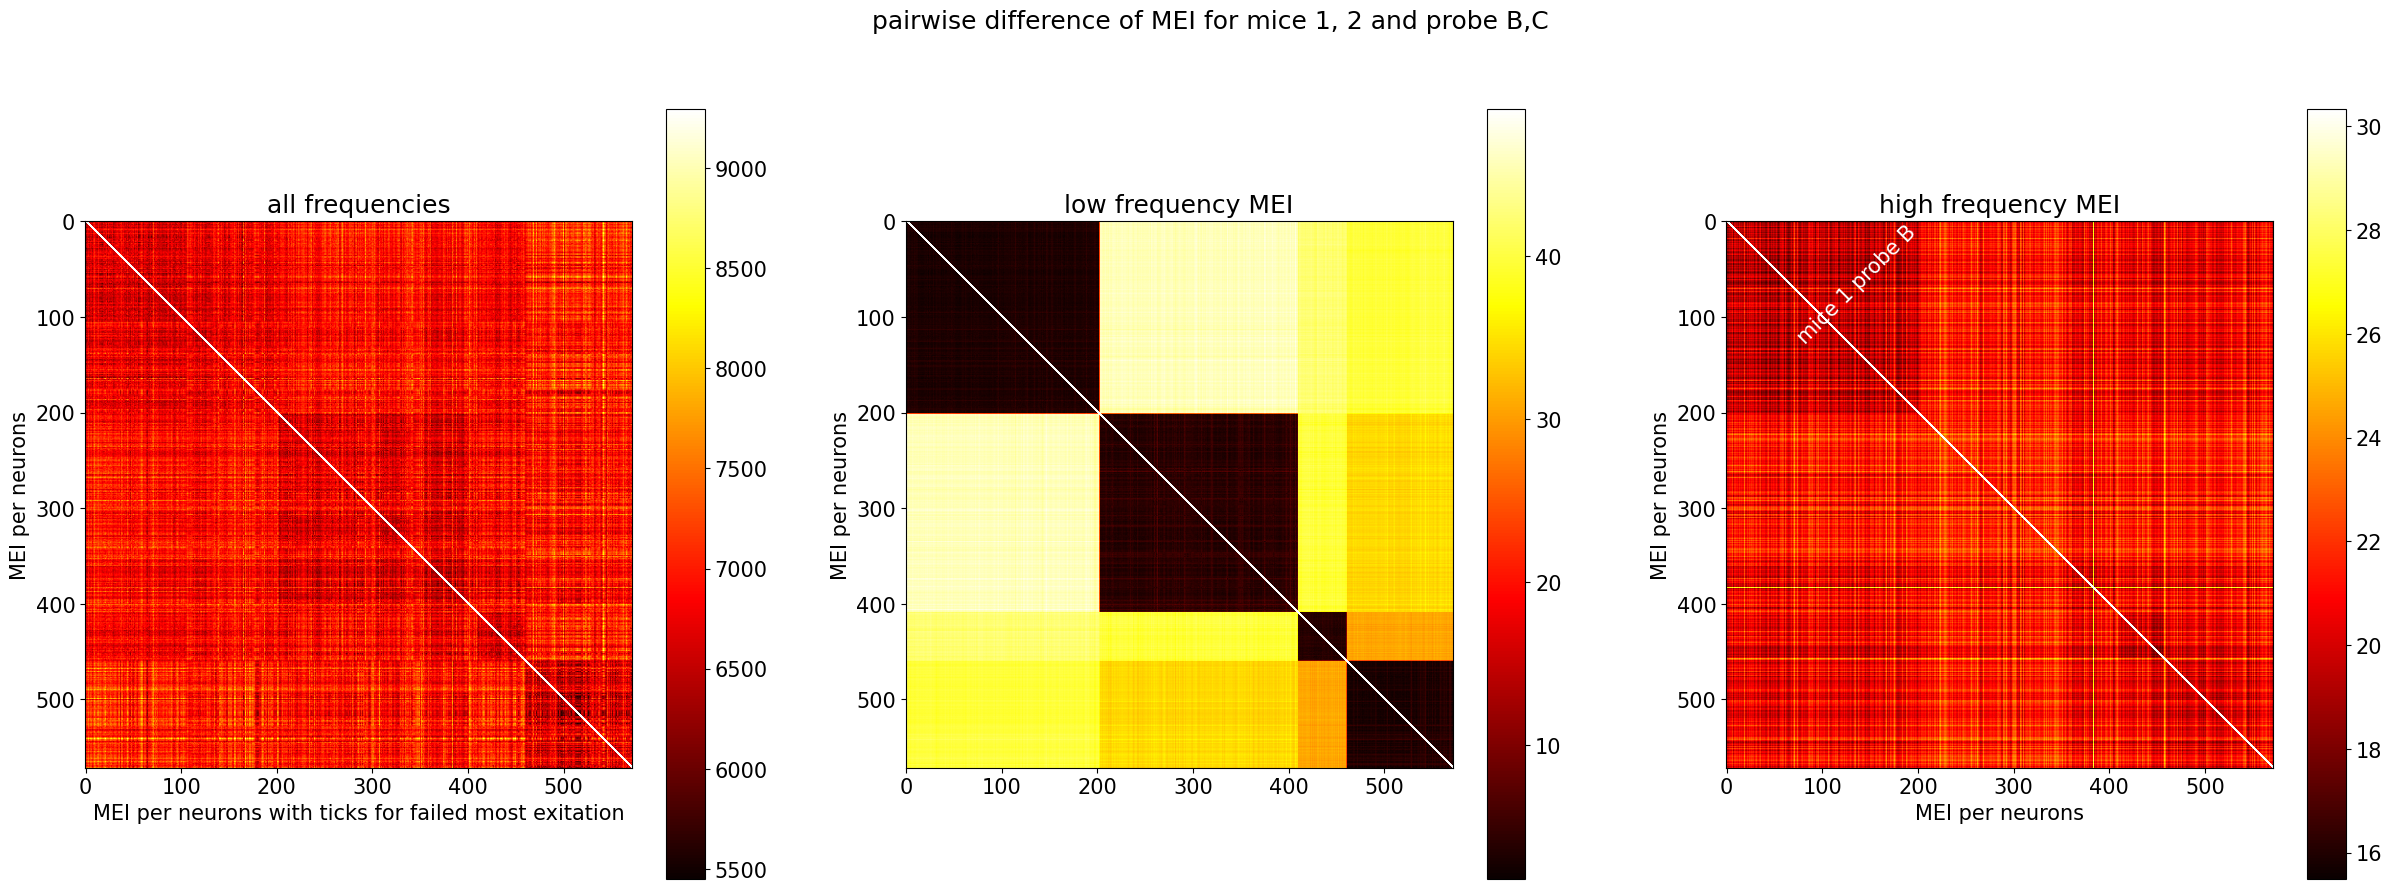

In [ ]:
plt.figure(figsize=(30, 10))  # Set the figure size as needed
plt.rcParams.update({'font.size': 15})
plt.subplot(1, 3, 1)
plt.imshow(pair_all, cmap = 'hot')
#plt.xticks(np.where(position.sort_values(['mice', 'probe']).failed_neuron)[0],color='w' )
plt.colorbar()
plt.ylabel('MEI per neurons')
plt.xlabel('MEI per neurons with ticks for failed most exitation')
plt.title('all frequencies')
plt.subplot(1, 3, 2)
plt.imshow(pair_all_low, cmap = 'hot')

#plt.xticks(np.where(position.sort_values(['mice', 'probe']).failed_neuron)[0],color='w' )
plt.colorbar()
plt.ylabel('MEI per neurons')
#plt.xlabel('MEI per neurons with ticks for failed most exitation')
plt.title('low frequency MEI')
plt.subplot(1, 3, 3)
plt.imshow(pair_all_high, cmap = 'hot')
plt.text(imagesB[0].shape[0], 0.5, 'mice 1 probe B', rotation = 45,  va='top', ha = 'right', color = 'w')

#plt.xticks(np.where(position.sort_values(['mice', 'probe']).failed_neuron)[0],color='w' )
plt.colorbar()
plt.ylabel('MEI per neurons')
plt.xlabel('MEI per neurons')
plt.title('high frequency MEI')
plt.suptitle('pairwise difference of MEI for mice 1, 2 and probe B,C')

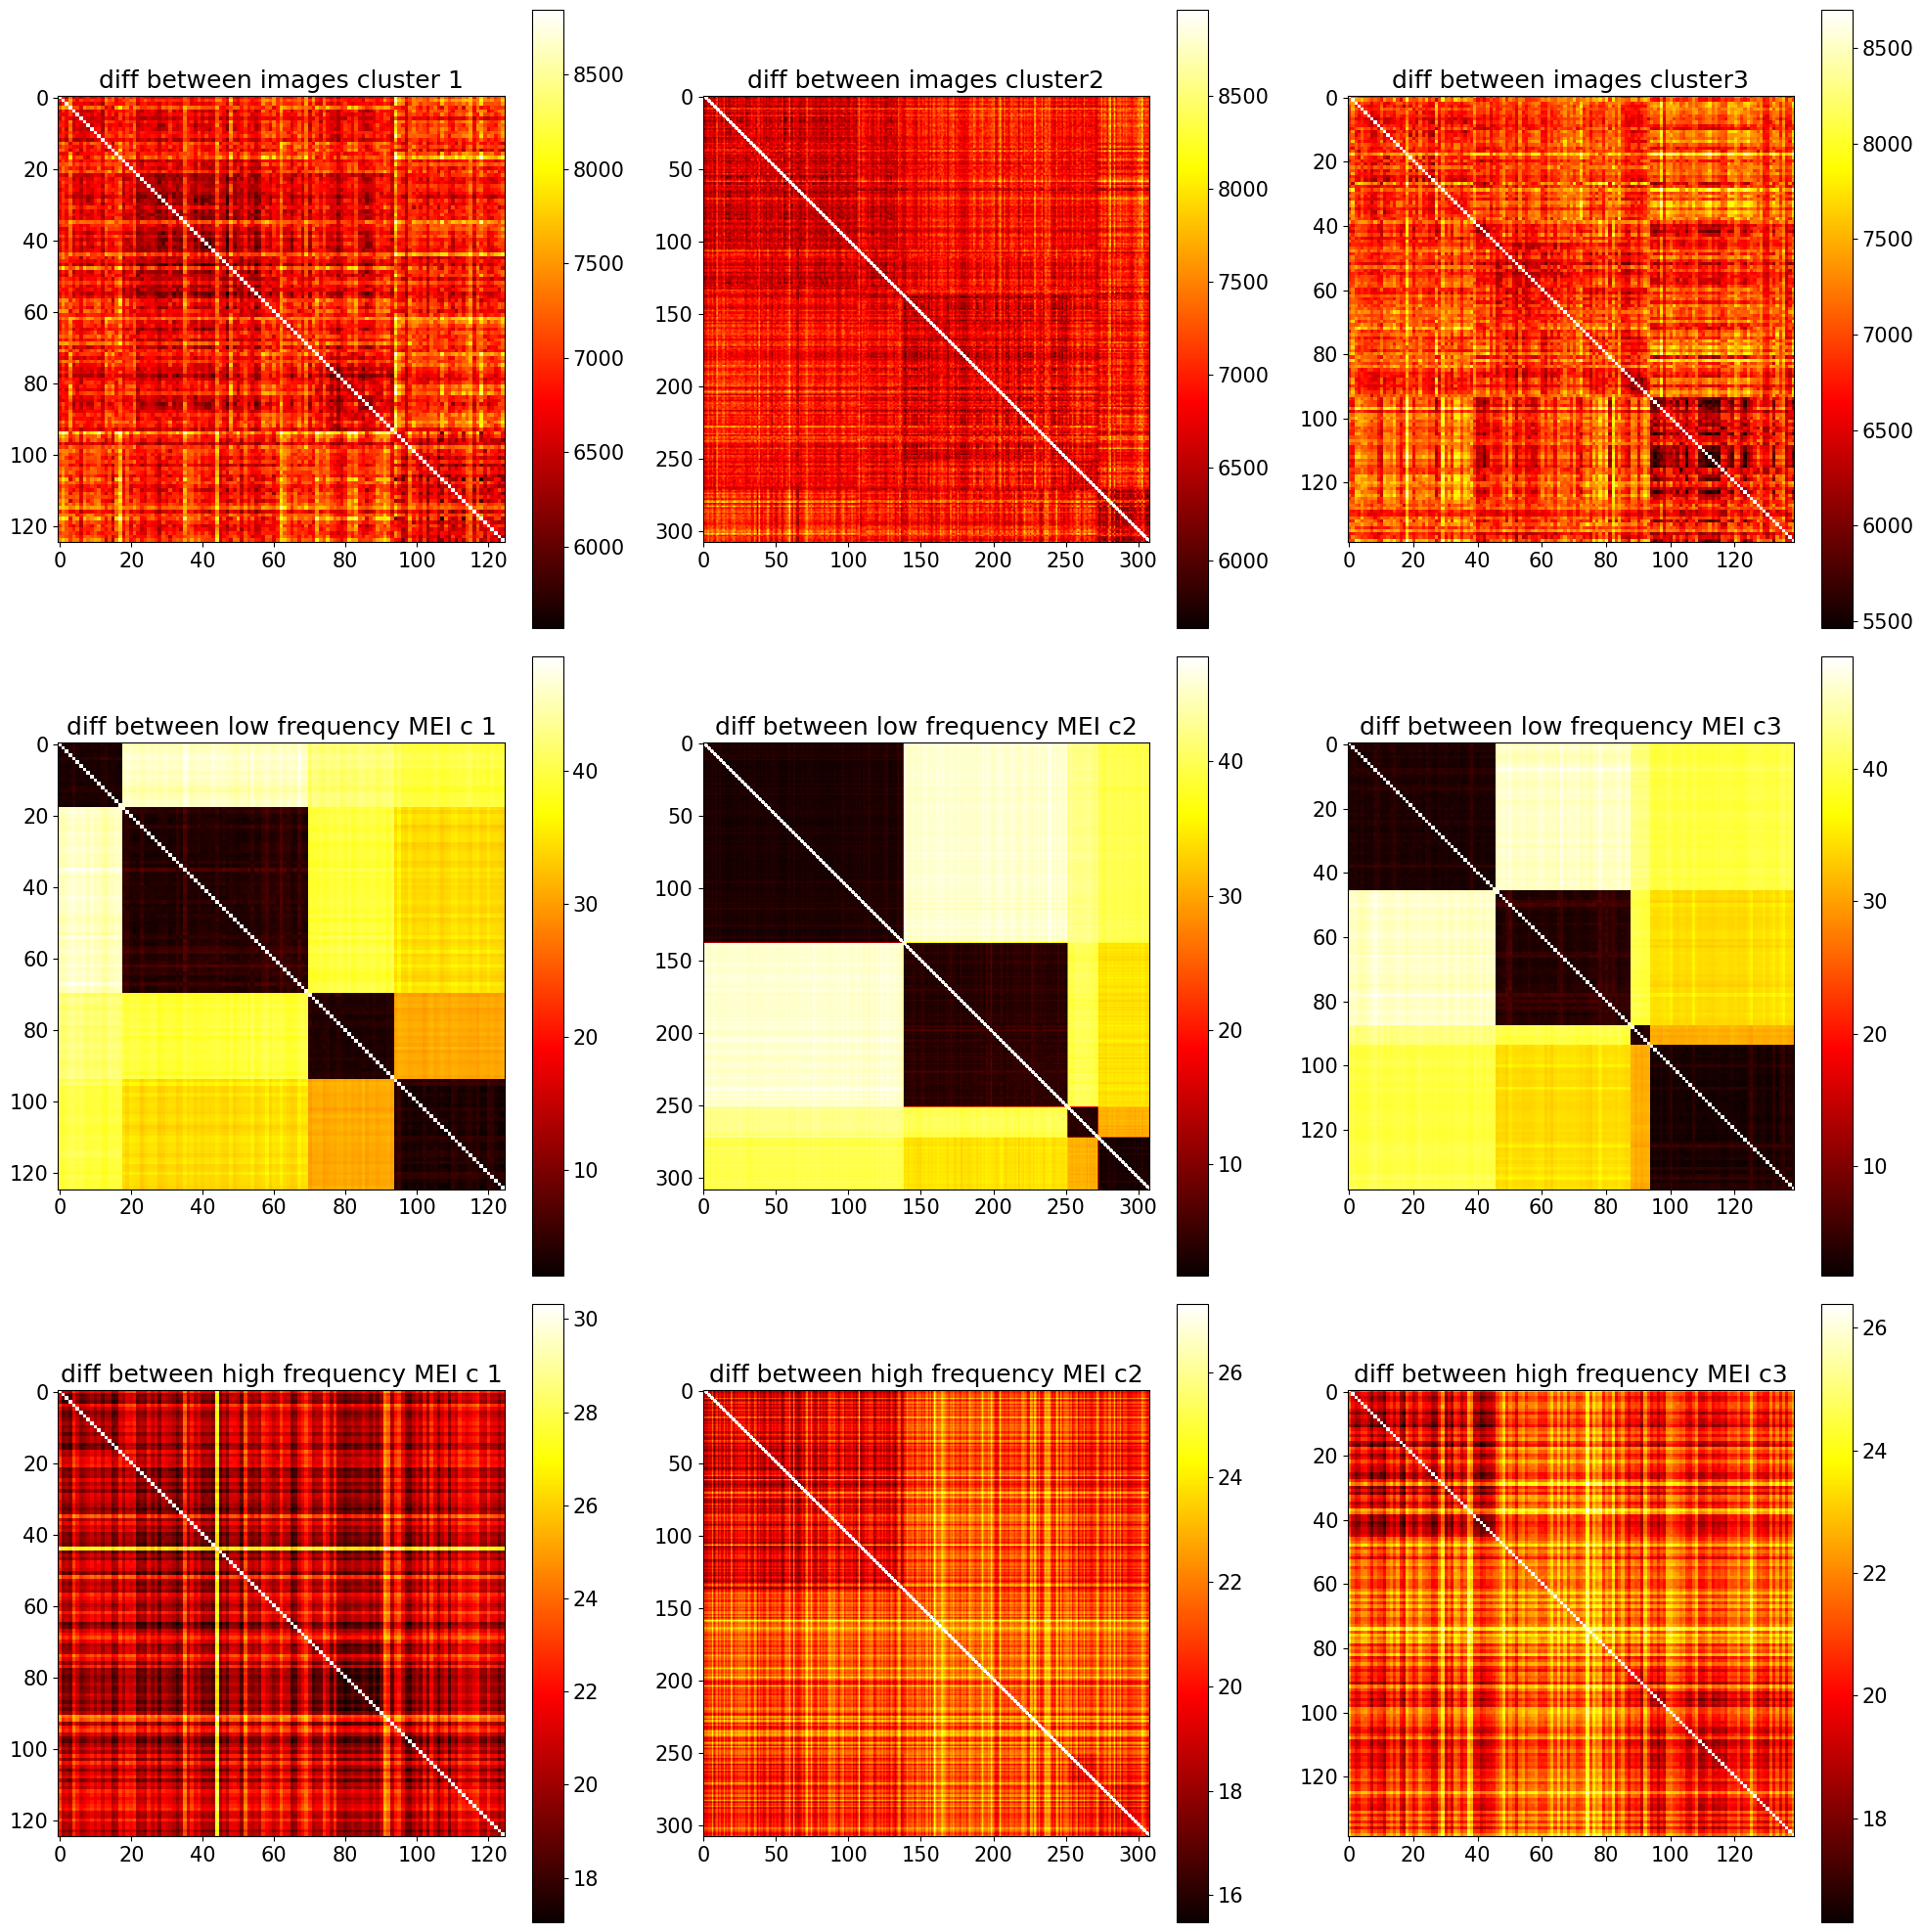

In [ ]:
plt.figure(figsize=(20,20))  # Set the figure size as needed
plt.subplot(3, 3, 1)
diff = pairwise(np.array(list_cluster1))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between images cluster 1')

plt.subplot(3, 3, 2)
diff = pairwise(np.array(list_cluster2))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between images cluster2')

plt.subplot(3, 3, 3)
diff = pairwise(np.array(list_cluster3))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between images cluster3')

lowpass = np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster1)])
plt.subplot(3, 3, 4)
diff = pairwise(lowpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between low frequency MEI c 1')

lowpass = np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster2)])
plt.subplot(3, 3, 5)
diff = pairwise(lowpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between low frequency MEI c2')

lowpass = np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster3)])
plt.subplot(3, 3, 6)
diff = pairwise(lowpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between low frequency MEI c3')

highpass = np.array([meanrgb(i) for i in np.array(list_cluster1)]) - np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster1)])
plt.subplot(3, 3, 7)
diff = pairwise(highpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between high frequency MEI c 1')

highpass = np.array([meanrgb(i) for i in np.array(list_cluster2)]) - np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster2)])
plt.subplot(3, 3, 8)
diff = pairwise(highpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between high frequency MEI c2')

highpass = np.array([meanrgb(i) for i in np.array(list_cluster3)]) - np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster3)])
plt.subplot(3, 3, 9)
diff = pairwise(highpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('diff between high frequency MEI c3')
plt.tight_layout()

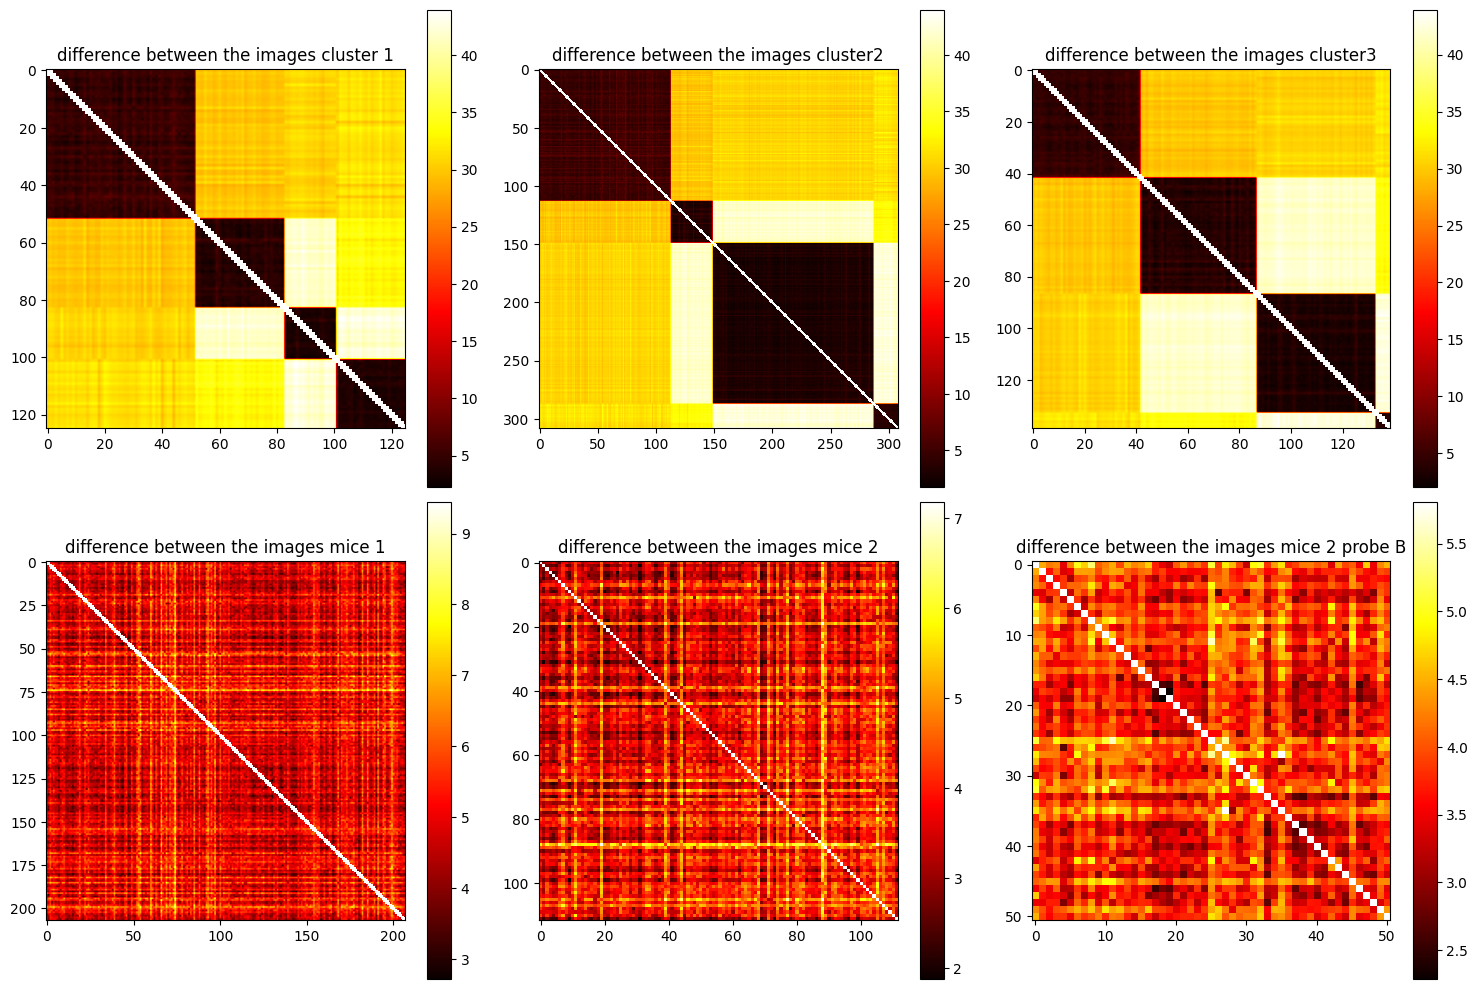

In [ ]:

lowpass = np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster1)])
plt.figure(figsize=(15, 10))  # Set the figure size as needed
plt.subplot(2, 3, 1)
diff = pairwise(lowpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster 1')

lowpass = np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster2)])
plt.subplot(2, 3, 2)
diff = pairwise(lowpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster2')

lowpass = np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster3)])
plt.subplot(2, 3, 3)
diff = pairwise(lowpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster3')

plt.subplot(2, 3, 4)
diff = pairwise(np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in images[0]]))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images mice 1')

plt.subplot(2, 3, 5)
diff = pairwise(np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in images[1]]))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images mice 2')

plt.subplot(2, 3, 6)
diff = pairwise(np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in imagesB[1]]))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images mice 2 probe B')
plt.tight_layout()
plt.show()
plt.close()



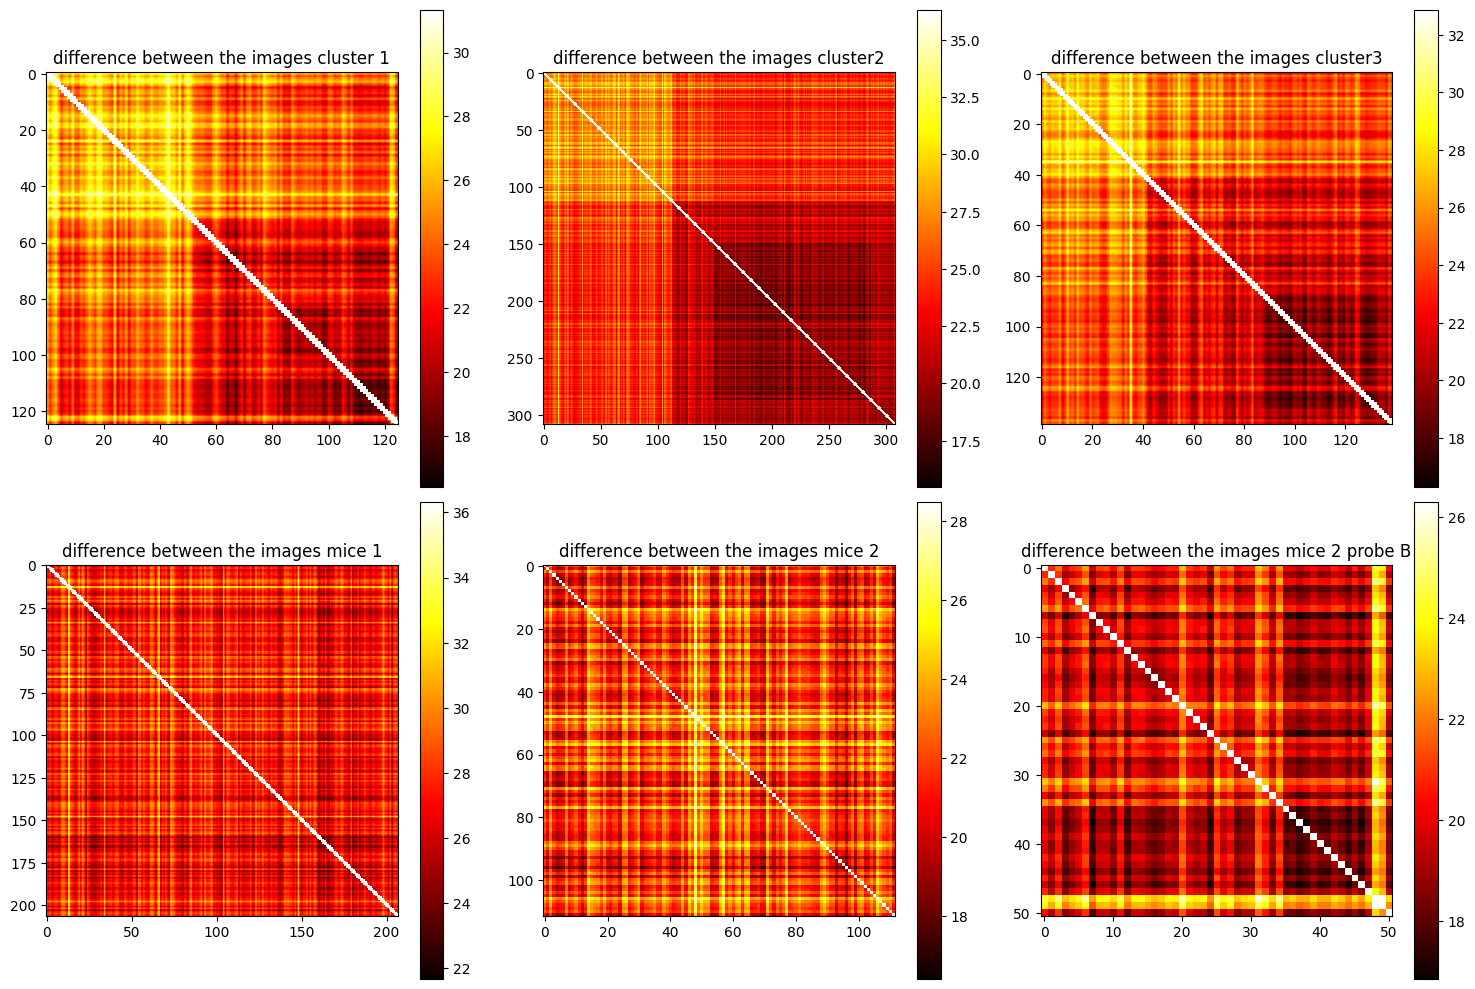

In [ ]:
from scipy import ndimage
highpass = np.array([meanrgb(i) for i in np.array(list_cluster1)]) - np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster1)])
plt.figure(figsize=(15, 10))  # Set the figure size as needed
plt.subplot(2, 3, 1)
diff = pairwise(highpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster 1')

highpass = np.array([meanrgb(i) for i in np.array(list_cluster2)]) - np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster2)])
plt.subplot(2, 3, 2)
diff = pairwise(highpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster2')

highpass = np.array([meanrgb(i) for i in np.array(list_cluster3)]) - np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.array(list_cluster3)])
plt.subplot(2, 3, 3)
diff = pairwise(highpass)
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster3')

plt.subplot(2, 3, 4)
diff = pairwise(np.array([meanrgb(i) for i in images[0]])-np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in images[0]]))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images mice 1')

plt.subplot(2, 3, 5)
diff = pairwise(np.array([meanrgb(i) for i in images[1]])-np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in images[1]]))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images mice 2')

plt.subplot(2, 3, 6)
diff = pairwise(np.array([meanrgb(i) for i in imagesB[1]])-np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in imagesB[1]]))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images mice 2 probe B')
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
from sklearn.cluster import SpectralClustering, KMeans
Clustering = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(np.array([ndimage.gaussian_filter(meanrgb(i), 10) for i in np.vstack((images[0],np.vstack((images[1],images[2]))))]).reshape((578,50176)))
position['labels_MEI_cluster'] = Clustering.labels_
fig = px.scatter_3d(position, x = position.anterior_posterior_ccf_coordinate, z =position.dorsal_ventral_ccf_coordinate, y= position.left_right_ccf_coordinate, hover_name = position.index,color=position.labels_MEI_cluster )
fig.update_traces(marker_size = 4)
fig.show()
fig.close()

IndexError: ignored

In [ ]:
only_valid_MEI = position[position['failed_neuron']==0]

list_cluster1_valid = []
pos = only_valid_MEI[only_valid_MEI['labels']==0]
for index, row in pos.iterrows():
  list_cluster1_valid.append(images[int(row.mice)][int(row['index'])])

list_cluster2_valid = []
pos = only_valid_MEI[only_valid_MEI['labels']==1]
for index, row in pos.iterrows():
  list_cluster2_valid.append(images[int(row.mice)][int(row['index'])])

list_cluster3_valid = []
pos = only_valid_MEI[only_valid_MEI['labels']==2]
for index, row in pos.iterrows():
  list_cluster3_valid.append(images[int(row.mice)][int(row['index'])])

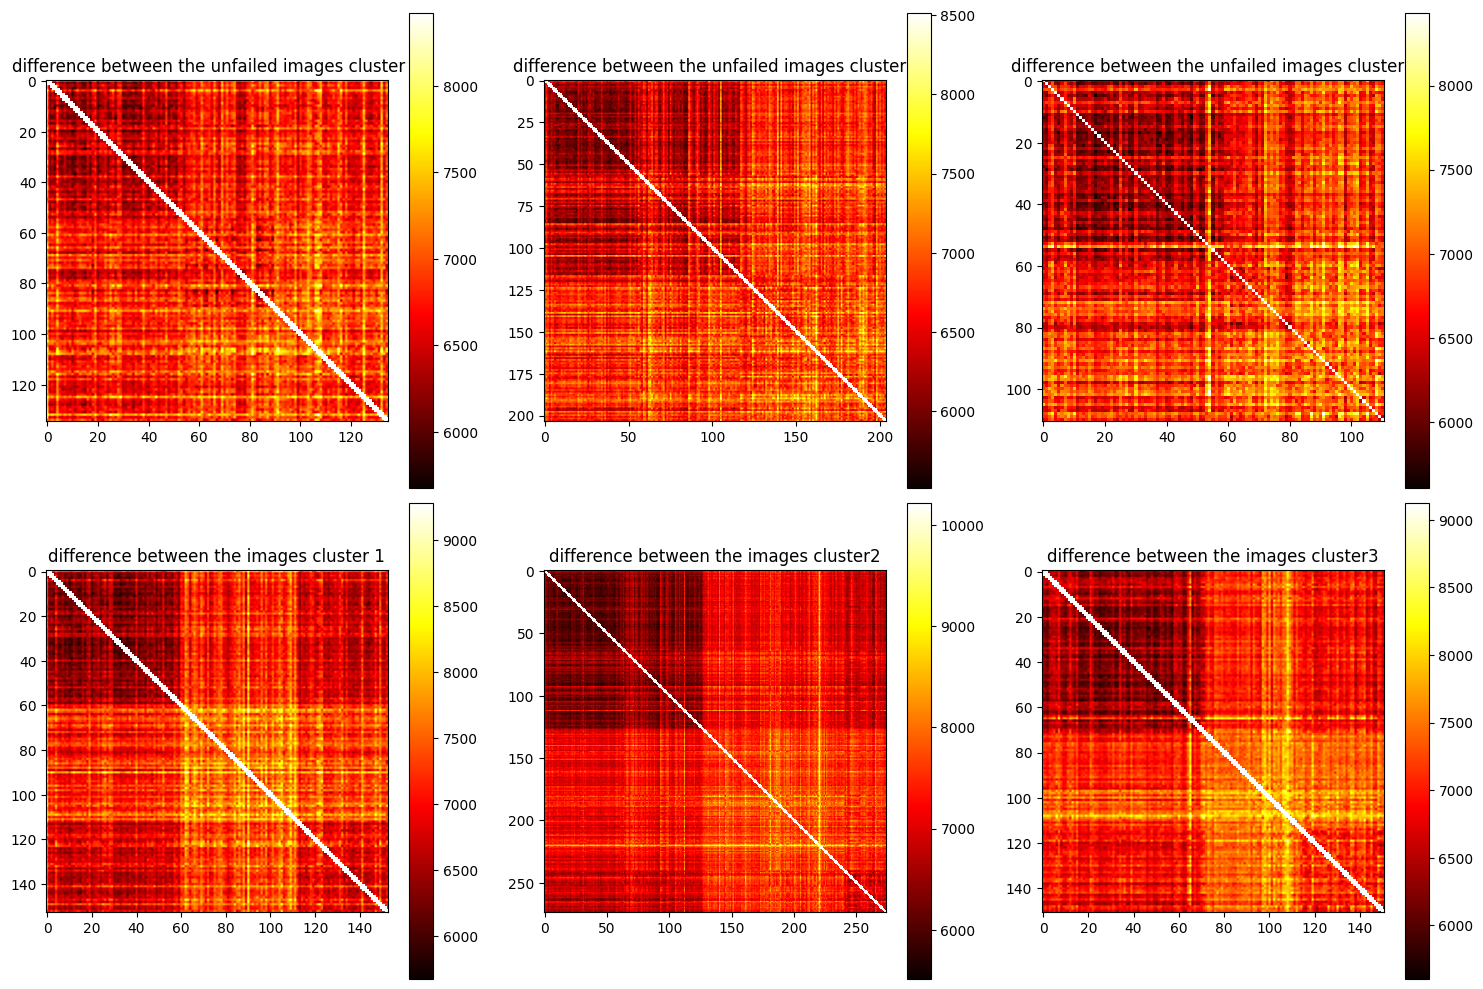

In [ ]:
plt.figure(figsize=(15, 10))  # Set the figure size as needed
plt.subplot(2, 3, 1)
diff = pairwise(np.array(list_cluster1_valid))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the unfailed images cluster 1')

plt.subplot(2, 3, 2)
diff = pairwise(np.array(list_cluster2_valid))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the unfailed images cluster2')

plt.subplot(2, 3, 3)
diff = pairwise(np.array(list_cluster3_valid))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the unfailed images cluster3')

plt.subplot(2, 3, 4)
diff = pairwise(np.array(list_cluster1))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster 1')

plt.subplot(2, 3, 5)
diff = pairwise(np.array(list_cluster2))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster2')

plt.subplot(2, 3, 6)
diff = pairwise(np.array(list_cluster3))
plt.imshow(diff, cmap = 'hot')
plt.colorbar()
plt.title('difference between the images cluster3')
plt.tight_layout()
plt.show()
plt.close()